In [23]:
import numpy as np
import cv2 as cv

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

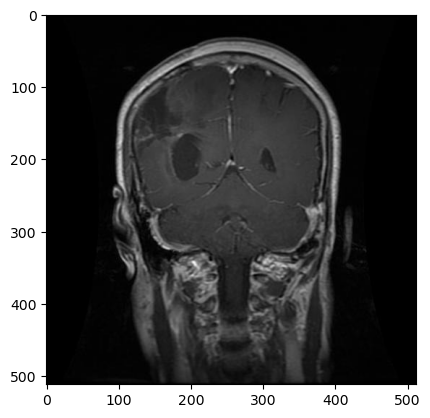

In [25]:
i = mpimg.imread('Training/glioma/Tr-gl_0010.jpg')
plt.imshow(i)

In [17]:
i.shape

(512, 512, 3)

In [21]:
#reduce dimesnions
#reshaping
#normalizing
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/fb/b4/31c461eef98b96b8a

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.0.2 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.


In [22]:
#sample code
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 1. Preprocessing the Image
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the input image.
    :param image_path: Path to the image file.
    :param target_size: Size to which the image should be resized.
    :return: Preprocessed image tensor.
    """
    img = load_img(image_path, target_size=target_size, color_mode="rgb")
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# 2. Building the Model
def build_model(input_shape=(224, 224, 3), feature_dim=512, time_steps=10):
    """
    Build the CNN + RNN model for tumor growth prediction.
    :param input_shape: Shape of the input image.
    :param feature_dim: Dimension of the feature vector from CNN.
    :param time_steps: Number of future time steps to predict.
    :return: Compiled model.
    """
    # Feature Extraction with CNN
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)  # Feature vector
    cnn_model = models.Model(inputs=base_model.input, outputs=x)

    # Time-Series Model (RNN)
    rnn_input = layers.Input(shape=(1, feature_dim))  # Sequence input
    lstm_out = layers.LSTM(256, return_sequences=False)(rnn_input)  # RNN Layer
    output = layers.Dense(time_steps)(lstm_out)  # Time-series output

    rnn_model = models.Model(inputs=rnn_input, outputs=output)

    # Combine CNN and RNN
    input_img = layers.Input(shape=input_shape)
    features = cnn_model(input_img)  # CNN output
    features = layers.Reshape((1, feature_dim))(features)  # Add time dimension
    predictions = rnn_model(features)  # RNN prediction

    model = models.Model(inputs=input_img, outputs=predictions)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# 3. Prepare the Dataset
# Simulate time-series data for tumor growth (replace this with real data)
def generate_fake_labels(num_samples, time_steps):
    """
    Generate fake time-series labels for tumor growth.
    :param num_samples: Number of samples in the dataset.
    :param time_steps: Number of time steps to predict.
    :return: Simulated tumor growth data.
    """
    return np.random.rand(num_samples, time_steps) * 10  # Random values for growth

# 4. Training the Model
def train_model(image_paths, labels, model, batch_size=8, epochs=10):
    """
    Train the CNN + RNN model.
    :param image_paths: List of image file paths.
    :param labels: Time-series labels for each image.
    :param model: Compiled model.
    :param batch_size: Training batch size.
    :param epochs: Number of training epochs.
    """
    # Preprocess images
    images = np.vstack([preprocess_image(path) for path in image_paths])
    
    # Train the model
    model.fit(images, labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Example Usage
if __name__ == "__main__":
    # Load and preprocess a sample image
    sample_image_path = "Training/glioma/Tr-gl_1307.jpg"  # Replace with your image path
    input_shape = (224, 224, 3)
    time_steps = 10

    # Build the model
    model = build_model(input_shape=input_shape, time_steps=time_steps)

    # Prepare dataset
    # For demonstration, generate fake labels for a single sample
    labels = generate_fake_labels(num_samples=1, time_steps=time_steps)
    train_model([sample_image_path], labels, model, epochs=5)

    # Predict future tumor growth for the sample image
    preprocessed_image = preprocess_image(sample_image_path, target_size=input_shape[:2])
    prediction = model.predict(preprocessed_image)
    print("Predicted tumor growth time-series:", prediction)


C:\Users\crdik\anaconda3\Lib\site-packages\numpy\_typing\_scalars.py:12: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  _BoolLike_co = Union[bool, np.bool]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\crdik\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\crdik\AppData\Local\Temp\ipykernel_5920\2274800292.py", line 2, in <module>
    import tensorflow as tf
  File "C:\Users\crdik\anaconda3\Lib\site-packages\tensorflow\__init__.py", line 49, in <module>
    from tensorflow._api.v2 import __internal__
  File "C:\Users\crdik\anaconda3\Lib\site-packages\tensorflow\_api\v2\__internal__\__init__.py", line 8, in <module>
    from tensorflow._api.v2.__internal__ import autograph
  File "C:\Users\crdik\anaconda3\Lib\site-packages\tensorflow\_api\v2\__internal__\autograph\__init__.py", line 8, in <module>
    from tensorflow.python.autograph.core.ag_ctx import control_status_ctx # line: 34
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\crdik\anaconda3\Lib\site-packages\tensorflow\python\auto

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 1. Preprocess the Input Image
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image for input to the CNN.
    :param image_path: Path to the image file.
    :param target_size: Size to resize the image to.
    :return: Preprocessed image tensor.
    """
    img = load_img(image_path, target_size=target_size, color_mode="rgb")
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# 2. Build the Feature Extractor (CNN)
def build_cnn_feature_extractor(input_shape=(224, 224, 3), feature_dim=512):
    """
    Build a CNN for feature extraction using a pre-trained ResNet50.
    :param input_shape: Shape of the input image.
    :param feature_dim: Output feature vector size.
    :return: CNN model for feature extraction.
    """
    base_model = ResNet50(include_top=False, weights="imagenet", input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)  # Extract feature vector
    x = layers.Dense(feature_dim, activation="relu")(x)  # Reduce to desired feature dimension
    feature_extractor = models.Model(inputs=base_model.input, outputs=x)
    return feature_extractor

# 3. Build the Time-Series Predictor
def build_time_series_predictor(feature_dim=512, time_steps=10):
    """
    Build a time-series prediction model using the extracted CNN features.
    :param feature_dim: Size of the feature vector from the CNN.
    :param time_steps: Number of future time steps to predict.
    :return: Time-series prediction model.
    """
    input_features = layers.Input(shape=(feature_dim,))
    x = layers.Dense(256, activation="relu")(input_features)
    x = layers.Dense(128, activation="relu")(x)
    output = layers.Dense(time_steps, activation="linear")(x)  # Predict future growth
    predictor = models.Model(inputs=input_features, outputs=output)
    return predictor

# 4. Combine the CNN and Time-Series Predictor
def build_combined_model(input_shape=(224, 224, 3), feature_dim=512, time_steps=10):
    """
    Combine the CNN feature extractor and time-series predictor.
    :param input_shape: Shape of the input image.
    :param feature_dim: Output feature vector size from CNN.
    :param time_steps: Number of future time steps to predict.
    :return: Combined model.
    """
    cnn_model = build_cnn_feature_extractor(input_shape, feature_dim)
    time_series_model = build_time_series_predictor(feature_dim, time_steps)

    # Input image
    input_image = layers.Input(shape=input_shape)
    features = cnn_model(input_image)  # Extract features with CNN
    predictions = time_series_model(features)  # Predict time-series data

    combined_model = models.Model(inputs=input_image, outputs=predictions)
    combined_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return combined_model

# 5. Example Usage
if __name__ == "__main__":
    # Path to your static image
    image_path = "'Training/glioma/Tr-gl_0010.jpg'"  # Update this with your image path
    
    # Preprocess the image
    input_shape = (224, 224, 3)
    image = preprocess_image(image_path, target_size=(224, 224))

    # Define model parameters
    feature_dim = 512  # Size of feature vector
    time_steps = 10  # Predict growth for 10 future time steps

    # Build and compile the model
    model = build_combined_model(input_shape=input_shape, feature_dim=feature_dim, time_steps=time_steps)
    model.summary()

    # Dummy data: Replace this with your real labels
    # Labels are time-series growth values for the tumor (e.g., tumor size in future steps)
    labels = np.random.rand(1, time_steps)  # Shape: (batch_size, time_steps)

    # Train the model (single image, single label)
    model.fit(image, labels, epochs=10, batch_size=1)

    # Predict future tumor growth
    predictions = model.predict(image)
    print("Predicted Tumor Growth:", predictions)


ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [32]:
!pip install keras

In [27]:
!pip install --upgrade tensorflow

In [30]:
!pip install numpy==1.23.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.


  Obtaining dependency information for numpy==1.23.5 from https://files.pythonhosted.org/packages/19/0d/b8c34e4baf258d77a8592bdce45183e9a12874c167f5966c7dd467b74ea9/numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.6 MB 660.6 kB/s eta 0:00:23
    --------------------------------------- 0.2/14.6 MB 3.0 MB/s eta 0:00:05
   - -------------------------------------- 0.6/14.6 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/14.6 MB 5.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/14.6 MB 8.0 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/14.6 MB 8.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/14.6 MB 8.7 MB/s eta 0:00:02
   -------- ------------------------------- 3.1/14.6 MB 8.6 MB/s eta 0:00:02
   --------- ------------------------------ 3.5/14.6 MB 8.9 MB/s eta 0:00:02
   ---------- --------